In [1]:
# Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu')
# 첫번째 인자 : 컨볼루션 필터의 수 입니다.
# 두번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
# padding : 경계 처리 방법을 정의합니다.
#   ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
#   ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
# input_shape : 샘플 수를 제외한 입력 형태를 정의 합니다. 모델에서 첫 레이어일 때만 정의하면 됩니다.
#   (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
# activation : 활성화 함수 설정합니다.
#   ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
#   ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
#   ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
#   ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

In [2]:
# root@32b86b4f803f:~# cat ~/.keras/keras.json
# {
#     "epsilon": 1e-07,
#     "image_data_format": "channels_last",
#     "backend": "tensorflow",
#     "floatx": "float32"
# }

# 입력 형태는
# image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 채널 수)로 이루어진 4D 텐서입니다.
# image_data_format이 ‘channels_first’인 경우 (샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서입니다.

# 출력 형태는
# image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 필터 수)로 이루어진 4D 텐서입니다.
# image_data_format이 ‘channels_first’인 경우 (샘플 수, 필터 수, 행, 열)로 이루어진 4D 텐서입니다.

In [3]:
# convolution filter count = 1
# convolution filter size = 2x2
# padding = valid
# input_shape = 3row 3column 1channel
# Conv2D(1, (2,2), padding='valid', input_shape=(3, 3, 1))

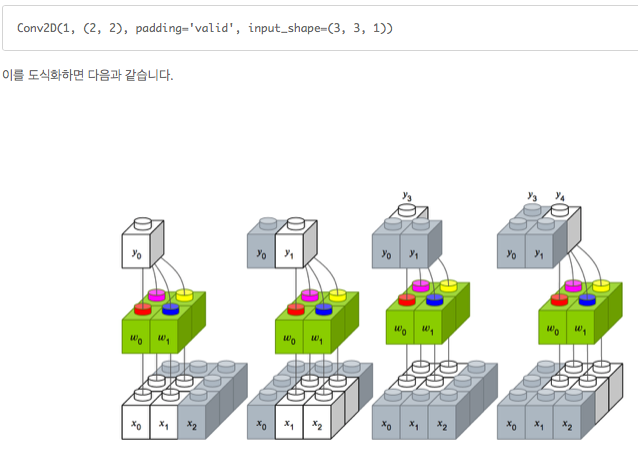

In [4]:
from IPython.display import Image, display
with open('01_Convolution.png', 'rb') as f:
    display(Image(f.read()))

In [5]:
# 입력 뉴런이 9개 출력 뉴런이 4개이면 
# Conv2D(1, (2,2), padding='valid', input_shape=(3, 3, 1)) 의 weight의 count = 4
# Dense(4, input_dim=9) 의 weight의 count = 9 * 4 = 36

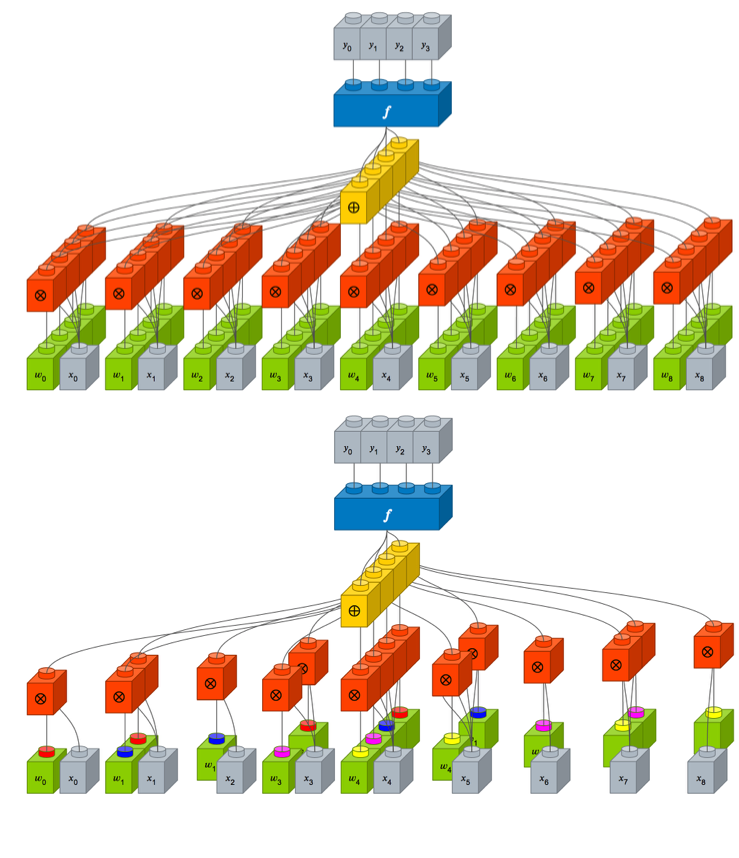

In [6]:
with open('02_Dense_Convol.png', 'rb') as f:
    display(Image(f.read()))

In [7]:
# Convolution 의 특징
# 1 파라미터 공유 = 
#   하나의 필터로 입력 이미지를 순회하기 때문에 순회할 때 적용되는 가중치는 모두 동일합니다. 
#   이는 학습해야할 가중치 수를 현저하게 줄여줍니다.
# 2 지역적인 특징을 인식 =
#   출력에 영향을 미치는 영역이 지역적으로 제한되어 있습니다. 
#   즉 그림에서 y~0~에 영향을 미치는 입력은 x~0~, x~1~, x~3~, x~4~으로 한정되어 있습니다. 
#   이는 영상 인식에 적합합니다. 예를 들어 코를 볼 때는 코 주변만 보고, 눈을 볼 때는 눈 주변만 보면서 학습 및 인식하는 것입니다.

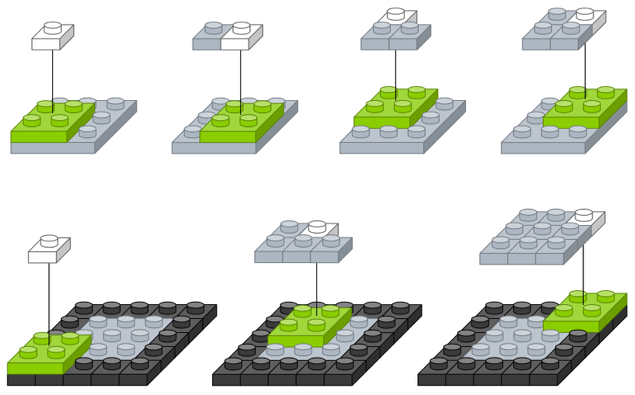

In [8]:
# 3 padding
#   ‘valid’인 경우에는 입력 이미지 영역에 맞게 필터를 적용하기 때문에 출력 이미지 크기가 입력 이미지 크기보다 작아집니다.
#   ‘same’은 출력 이미지와 입력 이미지 사이즈가 동일하도록 입력 이미지 경계에 빈 영역을 추가하여 필터를 적용합니다.
#   'same’으로 설정 시, 입력 이미지에 경계를 학습시키는 효과가 있습니다.
with open('03_Padding.png', 'rb') as f:
    display(Image(f.read()))

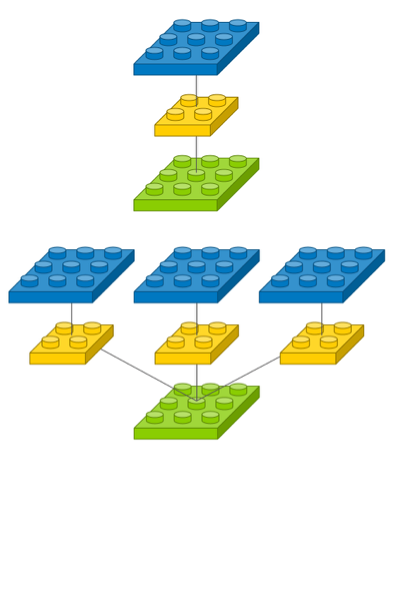

In [9]:
# 4 Convolution filter count
#    Conv2D(1, (2,2), padding='same', input_shape=(3,3,1))
#    Conv2D(3, (2,2), padding='same', input_shape=(3,3,1))
#    필터가 3개라서 출력 이미지도 필터 수에 따라 3개로 늘어났습니다.
with open('04_Convolution_MultiFilter.png', 'rb') as f:
    display(Image(f.read()))

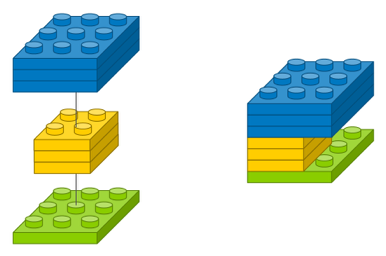

In [10]:
#   입력 이미지 사이즈가 3 x 3 입니다.
#   2 x 2 커널을 가진 필터가 3개입니다. 가중치는 총 12개 입니다.
#   출력 이미지 사이즈가 3 x 3이고 총 3개입니다. 이는 채널이 3개다라고도 표현합니다.
with open('05_Convolution_MultiFilter_inShort.png', 'rb') as f:
    display(Image(f.read()))

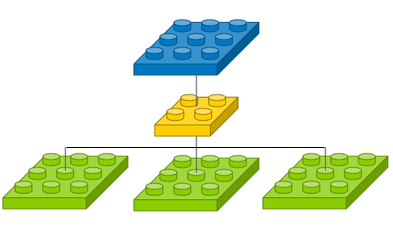

In [11]:
# 5 Convolution Channel Count
#    Conv2D(1, (2,2), padding='same', input_shape=(3,3,1))
#    Conv2D(1, (2,2), padding='same', input_shape=(3,3,3))
#    필터가 1개라서 출력 이미지도 필터 수에 따라 1개로 줄었습니다.
with open('06_Convolution_MultiChannel.png', 'rb') as f:
    display(Image(f.read()))

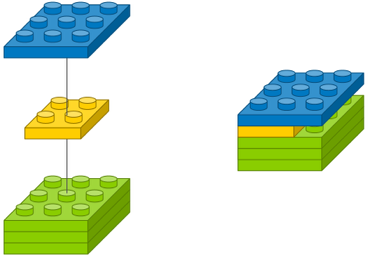

In [12]:
#   입력 이미지 사이즈가 3 x 3 이고, 채널이 3 개 입니다.
#   2 x 2 커널을 가진 필터가 1개입니다. 채널마다 같은 커널이 할당되어 총 가중치는 12개 입니다.
#   출력 이미지는 사이즈 3 x 3 이고 채널이 1 개 입니다.
with open('07_Convolution_MultiChannel_inShort.png', 'rb') as f:
    display(Image(f.read()))

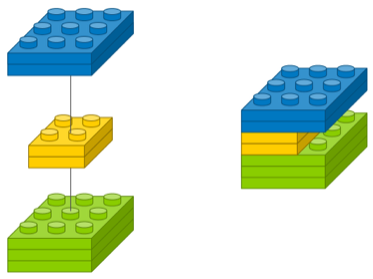

In [13]:
# 입력 이미지의 사이즈가 3 x 3 이고, 채널이 3개 이고,
# 사이즈가 2 x 2인 필터가 2개인 Convolution
# Conv2D(2, (2,2), padding='same', input_shape=(3, 3, 3))
# 채널마다 가중치가 할당되어 총 가중치는 3 x 2 x 2 x 2 = 24 개 입니다.
with open('08_Convolution_MultiFilter_MultiChannel_inShort.png', 'rb') as f:
    display(Image(f.read()))